In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
bs = pkg.resource('business_sites').geoframe()
bs.head()

,id,apn,bcccode,ownnam1,ownnam2,ownnam3,careof,strnum,strfra,strdir,...,locfra,locdir,locnam,loctyp,locsrm,loccit,bustype,point_x,point_y,geometry
0,0,7602110600,298,AT&T SERVICES INC,,,C/O PROPERTY TAX DEPT,909.0,,,...,,,11TH,ST,,CAMP PENDLETON,MISC PROFESSIONAL,6.210715e+06,2.026933e+06,POINT (-117.3976180786593 33.2236491608583)
1,1,7600801704,2,OCEANSIDE SMALL CRAFT HARBOR,DISTRICT,MARINA INN OCEANSIDE SUITES,,2008.0,,N,...,,N,HARBOR,DR,B,OCEANSIDE,PUBLIC AGENCY,6.210725e+06,2.021698e+06,POINT (-117.3973956118596 33.20926182539301)
2,2,7600801100,41,OCEANSIDE YACHT CLUB INC,,,,1950.0,,N,...,,N,HARBOR,DR,,OCEANSIDE,CLUBS - SOCIAL/SERVI,6.210790e+06,2.022669e+06,POINT (-117.3972182727266 33.21193062264967)
3,3,7600802400,313,ALOHA RESTAURANTS INC,DBA JOLLY ROGER RESTAURANT,#119,ATTN STEVE MOYER,204.0,,,...,,N,HARBOR,DR,,OCEANSIDE,CAFE,6.210974e+06,2.022894e+06,POINT (-117.3966268454532 33.21255490709683)
4,4,7600801000,492,YEARLEY SHARON&MONTE,DBA YEARLEY SAILBOATS,,,1850.0,,N,...,,N,HARBOR,DR,B,OCEANSIDE,BOAT&SUPPLIERS,6.211157e+06,2.023119e+06,POINT (-117.3960360886399 33.21317851962408)


In [4]:
len(bs)


101813

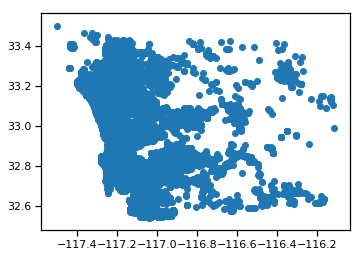

In [5]:
bs.plot()

In [6]:
bs.head().T

,0,1,2,3,4
id,0,1,2,3,4
apn,7602110600,7600801704,7600801100,7600802400,7600801000
bcccode,298,2,41,313,492
ownnam1,AT&T SERVICES INC,OCEANSIDE SMALL CRAFT HARBOR,OCEANSIDE YACHT CLUB INC,ALOHA RESTAURANTS INC,YEARLEY SHARON&MONTE
ownnam2,,DISTRICT,,DBA JOLLY ROGER RESTAURANT,DBA YEARLEY SAILBOATS
ownnam3,,MARINA INN OCEANSIDE SUITES,,#119,
careof,C/O PROPERTY TAX DEPT,,,ATTN STEVE MOYER,
strnum,909,2008,1950,204,1850
strfra,,,,,
strdir,,N,N,,N


In [7]:
bs.bustype.value_counts()

MISC PROFESSIONAL       14360
CAFE                     5248
DOCTOR/OSTEOPA/CHIRO     4727
APARTMENTS               3503
PUBLIC AGENCY            2914
ATTORNEY                 2883
SPECIALTY STORE-SOFT     2679
MISCELLANEOUS ASSOC      2261
CAFE-FAST FOOD           2229
REAL ESTATE&DEVELOPE     2137
BEAUTY SHOP              2068
MISC CONTRACTOR          2046
RELIGIOUS ORGANIZATI     2002
DENTIST                  1973
AUTO REPAIR SHOP         1841
CLOTHING                 1681
BUSINESS-MISCELLANEO     1656
MISCELLANEOUS AGENCY     1471
SPECIALTY/HARD GOODS     1273
INSURANCE BROKER         1251
ACCOUNTANT               1221
MFG LIGHT                1214
MISC SCHOOL              1171
ARCHITECT&ENGINEER       1146
MISC BROKER              1086
BANKS                    1075
FITNESS CENTER           1047
BODY CULTURE/MASSAGE      992
GROCERY STORES            856
SERVICE STATION&MKTS      847
                        ...  
HEAVY FARM EQUIPMENT        9
LAUNDRY - HAND              8
FURNITURE-

In [8]:
tracts = pkg.reference('tracts_boundaries').geoframe()
comm = pkg.reference('tracts_communities').dataframe()

In [9]:
joined = gpd.sjoin(bs, tracts).merge(comm, on='geoid')
joined.head().T

,0,1,2,3,4
id,1,6,7,8,9
apn,7600801704,7600801400,7600805500,7600805500,7600806000
bcccode,2,492,632,2,2
ownnam1,OCEANSIDE SMALL CRAFT HARBOR,OCEANSIDE MARINE CENTRE INC,BEACH CITIES DRY WALL,OCEANSIDE HARBOR HEADQUARTERS,CITY OF OCEANSIDE
ownnam2,DISTRICT,,,,OCEANSIDE ACQUATIC ADVENTURE
ownnam3,MARINA INN OCEANSIDE SUITES,,,,
careof,,,,,
strnum,2008,1550,1540,1540,1400
strfra,,,,,
strdir,N,N,N,N,N


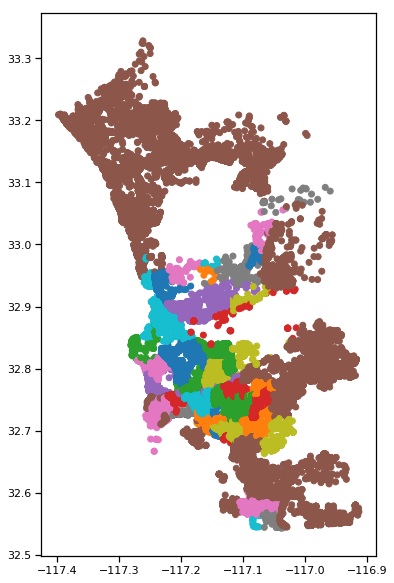

In [10]:
joined.plot(column='community_name', figsize=(15, 10))

In [11]:
joined.geoid.unique().size

523

In [12]:
import re

t = joined[['geoid','bustype']].copy()
t['bustype'] = t.bustype.apply(lambda v : re.sub('[^\w]','_',v.lower()))

totals = t.groupby('geoid').count()
totals.columns = ['total']

t['count'] = 1

t =  t.groupby(['geoid','bustype']).count().unstack()
t.columns = t.columns.droplevel(0)

tract_counts_columns = tracts[['geoid','geometry']].set_index('geoid').join(totals).join(t).fillna(0)
tract_counts_columns.head()

NameError: name 'tract_counts' is not defined

In [ ]:
t = joined[['geoid','bcccode','bustype']].copy()
t['count'] = 1
tract_counts_rows =  t.groupby(['geoid','bcccode','bustype']).count()
